Import the required packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

Read the dataset converting it into dataframe

In [2]:
df = pd.read_csv("FueLConsumption.csv")

Observe the data and it's summary statistics

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


The label is "CO2 Emissions". Now, Let's select some features that we want for regression.

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


Let's observe the label (CO2 Emissions) by visualizing it.

Text(0.5, 0.98, 'CO2 Emissions')

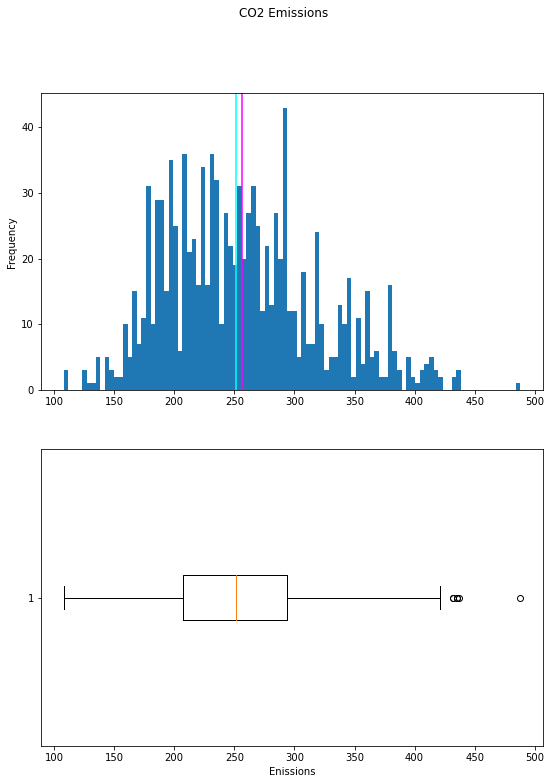

In [6]:
#Getting the label column
label = df['CO2EMISSIONS']

fig, ax = plt.subplots(2,1, figsize = (9,12))

#Plotting Histogram
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

#adding lines for mean ans median
ax[0].axvline(label.mean(), color = 'magenta', linestyle = '-')
ax[0].axvline(label.median(), color = 'cyan', linestyle = '-')


#Plottong the boxplot
ax[1].boxplot(label, vert = False)
ax[1].set_xlabel('Enissions')

#Adding title to the figure
fig.suptitle('CO2 Emissions')


Let's observe how each feature affects our label with the help of scatterplot.

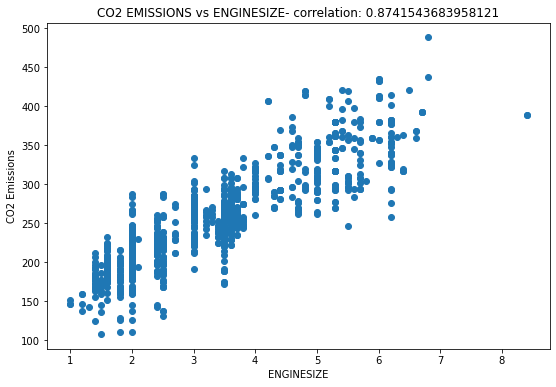

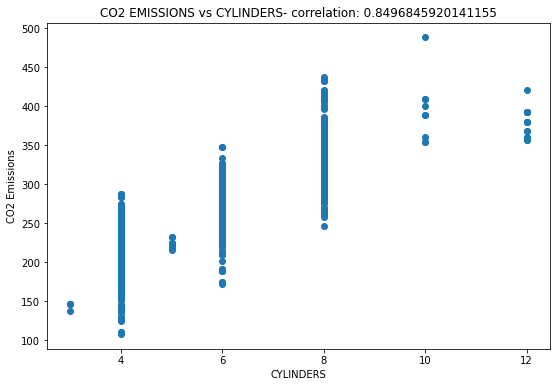

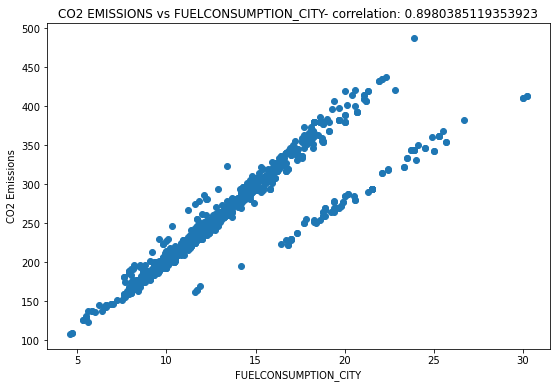

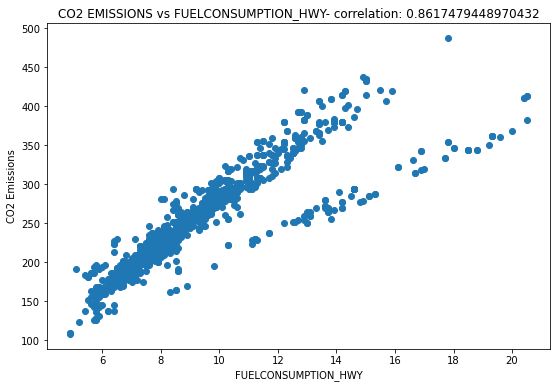

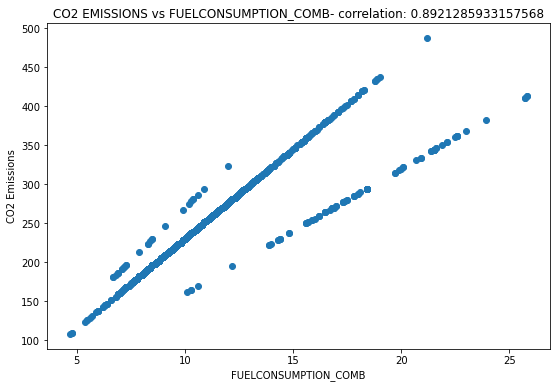

In [7]:
features = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = cdf[col]
    label = cdf['CO2EMISSIONS']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('CO2 Emissions')
    ax.set_title('CO2 EMISSIONS vs ' + col + '- correlation: ' + str(correlation))
plt.show()


From the above visualizations, we have concluded that we will use the columns: 
    EngineSize, Fuel Consumption, Cylinders

In [8]:
X, y = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']].values, cdf['CO2EMISSIONS'].values

Split the test and train set

In [9]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 746 rows
Test Set: 321 rows


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

Our Model training is complete and now it's time for model evaluation.

In [12]:
import numpy as np

predictions = model.predict(X_test)

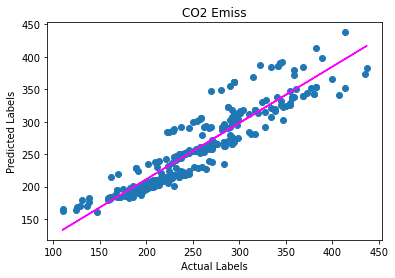

In [13]:
#plot actual label vs prediction
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('CO2 Emiss')

#overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Let's Evaluate our model

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 619.3446508186311
RMSE: 24.886635988390054
R2: 0.843809728990399


It is a pretty good model.